In [2]:
import os

In [3]:
data_dir='C:\\Users\\MADHUMITHA V\\Desktop\\gesture - Copy\\number_gesture'

In [4]:
os.listdir(data_dir)

['test', 'train', 'valid']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread

In [7]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\valid\\'
valid_path = 'C:\\Users\\MADHUMITHA V\\Desktop\\gesture - Copy\\number_gesture\\train\\'

In [8]:
test_path

'C:\\Users\\MADHUMITHA V\\Desktop\\gesture - Copy\\number_gesture\\test\\'

In [9]:
os.listdir(test_path)

['0', '1', '2', '3', '4', '5', '7', '8', '9']

In [10]:
os.listdir(train_path)

['0', '1', '2', '3', '4', '5', '7', '8', '9']

In [11]:
os.listdir(train_path+'0')

['N_0_261.jpg',
 'N_0_262.jpg',
 'N_0_263.jpg',
 'N_0_264.jpg',
 'N_0_265.jpg',
 'N_0_266.jpg',
 'N_0_267.jpg',
 'N_0_268.jpg',
 'N_0_269.jpg',
 'N_0_270.jpg',
 'N_0_271.jpg',
 'N_0_272.jpg',
 'N_0_273.jpg',
 'N_0_274.jpg',
 'N_0_275.jpg',
 'N_0_276.jpg',
 'N_0_277.jpg',
 'N_0_278.jpg',
 'N_0_279.jpg',
 'N_0_280.jpg',
 'N_0_281.jpg',
 'N_0_282.jpg',
 'N_0_283.jpg',
 'N_0_284.jpg',
 'N_0_285.jpg',
 'N_0_286.jpg',
 'N_0_287.jpg',
 'N_0_288.jpg',
 'N_0_289.jpg',
 'N_0_290.jpg',
 'N_0_291.jpg',
 'N_0_292.jpg',
 'N_0_293.jpg',
 'N_0_294.jpg',
 'N_0_295.jpg',
 'N_0_296.jpg',
 'N_0_297.jpg',
 'N_0_298.jpg',
 'N_0_299.jpg',
 'N_0_300.jpg']

In [12]:
n_0=train_path+'0\\'+'N_0_261.jpg'


In [13]:
n_0

'C:\\Users\\MADHUMITHA V\\Desktop\\gesture - Copy\\number_gesture\\valid\\0\\N_0_261.jpg'

In [14]:
imread(n_0).shape

(400, 400, 3)

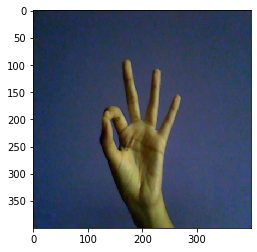

In [15]:
plt.imshow(imread(n_0))

In [16]:
len(os.listdir(train_path+'0'))

40

In [17]:
len(os.listdir(test_path+'0'))

20

In [18]:
# for images having different dimensions:

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'0'):
    
    img = imread(test_path+'0\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

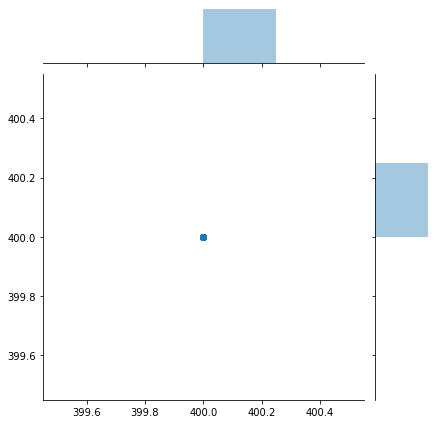

In [19]:
sns.jointplot(dim1,dim2)  #here images have the same dimension

In [20]:
image_shape=(400,400,3)

In [21]:
400*400*3

480000

### IMAGE DATA GENERATOR

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
#help(ImageDataGenerator)

In [24]:
#image_gen = ImageDataGenerator(rotation_range=20, width_shift_range= 0.1, height_shift_range=0.1,)
#used when malarial cells, etc are the dataset. For face recognition it is not recommended

In [25]:
image_gen = ImageDataGenerator(rescale=1/255, horizontal_flip=True, fill_mode='nearest')

In [26]:
imread(n_0).max()

206

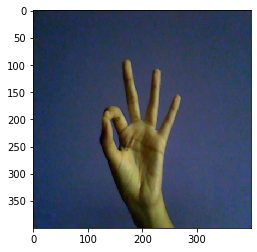

In [27]:
plt.imshow(imread(n_0))

In [28]:
n_0_img=imread(n_0)

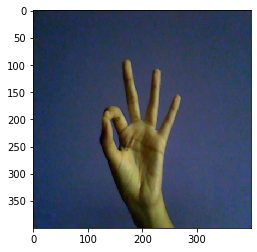

In [29]:
plt.imshow(image_gen.random_transform(n_0_img))

In [30]:
image_gen.flow_from_directory(train_path)

Found 360 images belonging to 9 classes.


In [31]:
os.listdir(train_path)

['0', '1', '2', '3', '4', '5', '7', '8', '9']

In [32]:
image_gen.flow_from_directory(test_path)

Found 180 images belonging to 9 classes.


# CREATING MODEL

In [33]:
from keras.models import Sequential

Using TensorFlow backend.


In [34]:
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D


In [35]:
model1 = Sequential()
model1.add(Convolution2D(32, (3, 3), input_shape=(400,400, 3), padding='valid'))
model1.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Convolution2D(32, (3, 3), padding='valid'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

#model.add(Convolution2D(64, (3, 3), padding='valid'))
#model.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dense(32))
model1.add(Activation('relu'))

#model.add(Dropout(0.5))
model1.add(Dense(9))
model1.add(Activation('softmax'))

model1.compile('adam',loss='categorical_crossentropy',
              #optimizer='rmsprop',
              metrics=['accuracy'])


In [36]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 398, 398, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 396, 396, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 396, 396, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 32)       

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [39]:
batch_size=32

In [40]:
image_shape[:2]

(400, 400)

In [41]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size= batch_size,
                                                class_mode='categorical')

Found 360 images belonging to 9 classes.


In [42]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                              shuffle=False)

Found 180 images belonging to 9 classes.


In [43]:
valid_image_gen= image_gen.flow_from_directory(valid_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size= batch_size,
                                                class_mode='categorical',
                                              shuffle=False)

Found 2700 images belonging to 9 classes.


In [44]:
train_image_gen.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '7': 6, '8': 7, '9': 8}

In [45]:
results = model1.fit_generator(train_image_gen,
                              epochs=20,
                              validation_data=test_image_gen)
                             # callbacks=[early_stop])

Epoch 1/20
12/12 [==============================] - 113s 9s/step - loss: 8.8194 - accuracy: 0.1139 - val_loss: 2.1986 - val_accuracy: 0.0056
Epoch 2/20
12/12 [==============================] - 117s 10s/step - loss: 2.0111 - accuracy: 0.2583 - val_loss: 1.1566 - val_accuracy: 0.2222
Epoch 3/20
12/12 [==============================] - 121s 10s/step - loss: 1.6993 - accuracy: 0.3778 - val_loss: 0.6701 - val_accuracy: 0.4389
Epoch 4/20
12/12 [==============================] - 114s 9s/step - loss: 1.3648 - accuracy: 0.5778 - val_loss: 0.3989 - val_accuracy: 0.6333
Epoch 5/20
12/12 [==============================] - 114s 10s/step - loss: 1.1298 - accuracy: 0.6056 - val_loss: 0.1063 - val_accuracy: 0.7611
Epoch 6/20
12/12 [==============================] - 113s 9s/step - loss: 0.7102 - accuracy: 0.8083 - val_loss: 0.1475 - val_accuracy: 0.8111
Epoch 7/20
12/12 [==============================] - 113s 9s/step - loss: 0.3638 - accuracy: 0.8972 - val_loss: 0.0066 - val_accuracy: 0.8056
Epoch 8/20

In [46]:
metrics = pd.DataFrame(model1.history.history)

In [47]:
metrics

,val_loss,val_accuracy,loss,accuracy
0,2.198596,0.005556,8.564669,0.113889
1,1.156621,0.222222,1.975740,0.258333
2,0.670132,0.438889,1.723555,0.377778
3,0.398945,0.633333,1.352503,0.577778
4,0.106308,0.761111,1.130702,0.605556
5,0.147463,0.811111,0.714909,0.808333
6,0.006632,0.805556,0.372088,0.897222
7,0.043540,0.850000,0.177417,0.963889
8,0.025701,0.850000,0.104613,0.983333
9,0.014637,0.877778,0.207575,0.922222


In [48]:
#model.save('best_model.h5')

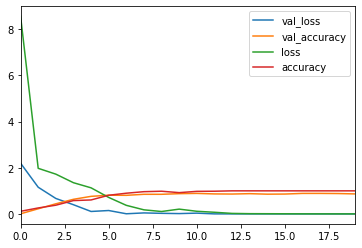

In [49]:
metrics.plot()

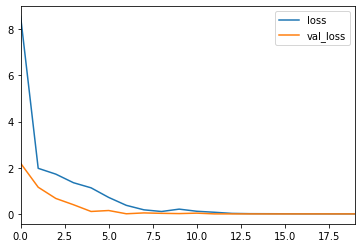

In [50]:
metrics[['loss','val_loss']].plot()

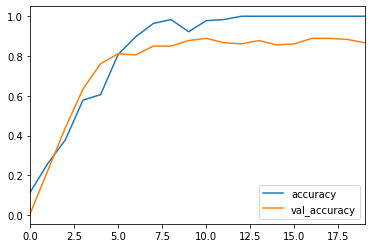

In [51]:
metrics[['accuracy','val_accuracy']].plot()

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
Y_pred = model1.predict_generator(valid_image_gen, 85)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_image_gen.classes, y_pred))
print('Classification Report')
target_names = ['0', '1', '2','3','4','5','7','8','9']
print(classification_report(valid_image_gen.classes, y_pred, target_names=target_names))


Confusion Matrix
[[195   0  13   0  17  12  26  37   0]
 [  0 192   0  23  11   0   2   0  72]
 [  0 143  40  68  24   0   0   0  25]
 [  0  74   0 142  30   1   2   5  46]
 [  0 109   0  57 101   0   0   1  32]
 [  0  12   0  29 109  58   6   7  79]
 [  0  86   0  13  21   0  85   0  95]
 [  0  67   0  28  40   0  13  49 103]
 [  0  97   0  36  31   0  12   0 124]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       300
           1       0.25      0.64      0.36       300
           2       0.75      0.13      0.23       300
           3       0.36      0.47      0.41       300
           4       0.26      0.34      0.30       300
           5       0.82      0.19      0.31       300
           7       0.58      0.28      0.38       300
           8       0.49      0.16      0.25       300
           9       0.22      0.41      0.28       300

    accuracy                           0.37      2700
   macro avg 

In [54]:
Y_pred = model1.predict_generator(test_image_gen, 20//3 )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_image_gen.classes, y_pred))
print('Classification Report')
target_names = ['0', '1', '2','3','4','5','7','8','9']
print(classification_report(test_image_gen.classes, y_pred, target_names=target_names))


Confusion Matrix
[[20  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0]
 [ 0 10 10  0  0  0  0  0  0]
 [ 0  1  0 14  0  0  0  0  5]
 [ 0  5  0  0 15  0  0  0  0]
 [ 0  0  0  0  2 18  0  0  0]
 [ 0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  1  0  0 19  0]
 [ 0  0  0  0  0  0  0  0 20]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.56      1.00      0.71        20
           2       1.00      0.50      0.67        20
           3       1.00      0.70      0.82        20
           4       0.83      0.75      0.79        20
           5       1.00      0.90      0.95        20
           7       1.00      1.00      1.00        20
           8       1.00      0.95      0.97        20
           9       0.80      1.00      0.89        20

    accuracy                           0.87       180
   macro avg       0.91      0.87      0.87       180
weighted avg       0.91      0.87      0

In [62]:
score = model1.evaluate_generator(test_image_gen, 9/batch_size, workers=12)
print("Loss: ", score[0], "Accuracy: ", score[1])

Loss:  0.11065281927585602 Accuracy:  1.0


In [ ]:
#import cv2

In [ ]:
#img = cv2.imread('N_7_1.jpg')

#img = np.reshape(img,[1,400,400,3])

#model.predict(img)


In [1]:
#test_predictions = model.predict(test_img_gen)

In [ ]:
#test_predictions=np.reshape(test_predictions,(6,))

In [ ]:

#test_predictions = pd.Series(test_predictions)


In [ ]:
#from tensorflow.keras.models import load_model

In [ ]:
#later_model=load_model('best_model.h5')

In [ ]:
#img = cv2.imread('N_7_1.jpg')

#img = np.reshape(img,[1,400,400,3])
#later_model.predict(img)